In [46]:
import numpy as np
data = np.load('lab2_data.npz', allow_pickle=True)['data']

In [47]:
phoneHMMs = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
#phoneHMMs = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()

In [48]:
phoneHMMs["f"]

{'name': 'f',
 'startprob': array([1., 0., 0., 0.]),
 'transmat': array([[0.8437548, 0.1562452, 0.       , 0.       ],
        [0.       , 0.7090222, 0.2909778, 0.       ],
        [0.       , 0.       , 0.3064214, 0.6935785],
        [0.       , 0.       , 0.       , 1.       ]]),
 'means': array([[ 3.223918e+02, -2.714506e+02, -1.279559e+02,  4.936052e+01,
         -1.980236e+00, -9.977302e+00, -2.686330e+01, -4.009798e+01,
          3.357593e-01, -7.339875e+01,  2.645822e+01, -6.140060e+01,
          3.153127e+01],
        [ 4.886330e+02, -2.018883e+02, -1.998543e+02, -3.249403e+00,
         -1.454704e+01, -1.020947e+01, -5.742544e+01, -1.035629e+02,
         -2.134682e+01, -9.308153e+01,  2.632338e+01, -8.978764e+01,
          2.653858e+01],
        [ 5.815154e+02,  2.457827e+02,  2.437778e+01, -5.956849e+01,
         -1.490782e+02,  6.251358e+01, -1.867431e+01, -4.977795e+01,
          7.758113e+00,  1.062016e+02,  1.829358e+01,  2.677407e+01,
          1.664870e+01]]),
 'covars':

In [49]:
list(sorted(phoneHMMs.keys()))

['ah',
 'ao',
 'ay',
 'eh',
 'ey',
 'f',
 'ih',
 'iy',
 'k',
 'n',
 'ow',
 'r',
 's',
 'sil',
 'sp',
 't',
 'th',
 'uw',
 'v',
 'w',
 'z']

In [50]:
import pandas as pd
# Convert to DataFrame
df = pd.DataFrame(phoneHMMs["f"]["covars"])
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,14393.750,7297.190,6038.205,4883.020,5352.986,6555.408,8515.243,10671.100,10332.080,10120.830,8832.828,10312.580,8047.129
1,5798.724,8801.242,6390.720,4633.797,6440.550,9419.420,5861.454,7522.581,10917.650,7469.309,9418.893,6266.922,7712.290
2,13902.990,10563.130,4930.186,19097.510,14233.630,5392.508,4200.502,4250.925,8332.633,24471.450,4684.705,6569.889,4883.375


In [51]:
pd.DataFrame(phoneHMMs["f"]["means"])

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,322.3918,-271.4506,-127.95590,49.360520,-1.980236,-9.977302,-26.86330,-40.09798,0.335759,-73.39875,26.45822,-61.40060,31.53127
1,488.6330,-201.8883,-199.85430,-3.249403,-14.547040,-10.209470,-57.42544,-103.56290,-21.346820,-93.08153,26.32338,-89.78764,26.53858
2,581.5154,245.7827,24.37778,-59.568490,-149.078200,62.513580,-18.67431,-49.77795,7.758113,106.20160,18.29358,26.77407,16.64870


In [52]:
prondict = {} 
prondict['o'] = ['ow']
prondict['z'] = ['z', 'iy', 'r', 'ow']
prondict['1'] = ['w', 'ah', 'n']
prondict['2'] = ['t', 'uw']
prondict['3'] = ['th', 'r', 'iy']
prondict['4'] = ['f', 'ao', 'r']
prondict['5'] = ['f', 'ay', 'v']
prondict['6'] = ['s', 'ih', 'k', 's']
prondict['7'] = ['s', 'eh', 'v', 'ah', 'n']
prondict['8'] = ['ey', 't']
prondict['9'] = ['n', 'ay', 'n']
isolated = {}
for digit in prondict.keys():
    isolated[digit] = ['sil'] + prondict[digit] + ['sil']

In [53]:
def concatTwoHMMs1(hmm1, hmm2):
   #startprob
   M1 = len(hmm1["startprob"])
   M2 = len(hmm2["startprob"])
   startprob_conc = np.zeros((M1+M2-1))
   for i in range(M1+M2-1):
      if i<M1-1:
         startprob_conc[i]=hmm1["startprob"][i]
      else:
         startprob_conc[i]=hmm1["startprob"][-1]*hmm2["startprob"][i-M2]
concatTwoHMMs1(phoneHMMs["sil"],phoneHMMs["sil"])


# 4

In [54]:
from lab2_proto import concatHMMs
wordHMMs = {}
wordHMMs['o'] = concatHMMs(phoneHMMs, isolated['o'])

# 5

### 5.1

In [55]:
example = np.load('lab2_example.npz', allow_pickle=True)['example'].item()

In [56]:
list(example.keys())

['filename',
 'samplingrate',
 'gender',
 'speaker',
 'digit',
 'repetition',
 'samples',
 'lmfcc',
 'obsloglik',
 'logalpha',
 'loglik',
 'vloglik',
 'vpath',
 'logbeta',
 'loggamma']

In [57]:
from lab2_tools import log_multivariate_normal_density_diag

In [58]:
X0 = example['lmfcc'] #71 "frames" of size 13, one datapoint
obsloglik=log_multivariate_normal_density_diag(X0,wordHMMs['o']["means"],wordHMMs['o']["covars"])
np.allclose(obsloglik,example['obsloglik'])

True

In [148]:
import matplotlib.pyplot as plt

def plot(data,xlabel="",ylabel="",title=""):
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(data, cmap='viridis')
    plt.colorbar(label='Value')
    #plt.xlim(0,400)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()


In [151]:
#choose another data point
data[0]

{'filename': '/home/giampi/corpora/tidigits/disc_4.2.1/tidigits/test/man/bm/oa.wav',
 'samplingrate': 20000,
 'gender': 'man',
 'speaker': 'bm',
 'digit': 'o',
 'repetition': 'a',
 'samples': array([-2, -1, -3, ..., 10,  8,  5], dtype=int16),
 'lmfcc': array([[  64.7657709 ,  -65.84854216,   96.90766069, ...,  -19.82632821,
           11.63249931,  159.50790488],
        [  57.72402791,  -79.93732698,  105.80893583, ...,  -11.84501965,
          109.29701349,  138.79176124],
        [  62.16944867, -121.81014369,   61.89899215, ...,   13.28252915,
         -127.7140298 , -128.75563442],
        ...,
        [ 190.29491187,   97.34488369,  175.61357289, ...,  -62.63035172,
          138.96640354,   82.95734165],
        [ 201.37123403,   80.09496653,   50.98133557, ...,  219.16711476,
           94.41131525, -100.10312668],
        [ 194.17067167,   70.85205455,   40.456538  , ...,   -3.81053312,
          143.83615904,  -42.56212766]])}

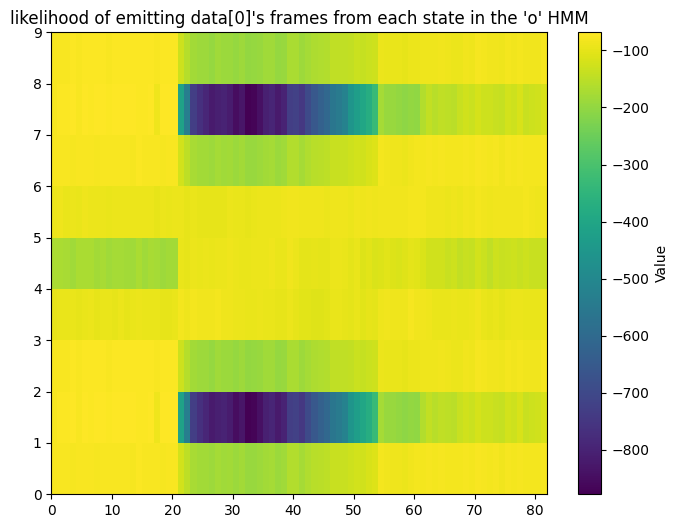

In [156]:
#calculate log likelihood of the datapoint and plot that
X1 = data[0]["lmfcc"]
log_likelihoods=log_multivariate_normal_density_diag(X1,wordHMMs['o']["means"],wordHMMs['o']["covars"])
plot(log_likelihoods.T,title="likelihood of emitting data[0]'s frames from each state in the 'o' HMM")

### 5.2

In [110]:
from lab2_tools import logsumexp
def forward(log_emlik, log_startprob, log_transmat):
    """Forward (alpha) probabilities in log domain.

    Args:
        log_emlik (B):NxM array of emission log likelihoods, N frames (timesteps), M states
        log_startprob (pi): M array log probability to start in state i
        log_transmat (A): M+1xM+1 array log transition probability from state i to j

    Output:
        forward_prob: NxM array of forward log probabilities for each of the M states in the model
    """
    #j enumerates states
    N,M = log_emlik.shape

    #alpha in the log domain technically "logalpha"
    alpha = -np.inf * np.ones((N,M))

    #first row of alpha
    for j in range(M):
        alpha[0,j] = log_startprob[j]+log_emlik[0,j]
        #log_emlik[i,j]=log phi_j(x_i)
        #we want log phi_j(x_o) => log_emlik[0,j]
    #all other rows
    for n in range(1,N):
        for j in range(0,M):
            #log_transmat[:-1,j]) because it includes transitions to the non-emitting final state which we dont want
            alpha[n,j]=logsumexp(alpha[n-1,:]+log_transmat[:-1,j])+log_emlik[n,j]
    return alpha

In [113]:
fwd=forward(obsloglik,np.log(wordHMMs['o']["startprob"]),np.log(wordHMMs["o"]["transmat"]))

C:\Users\A\AppData\Local\Temp\ipykernel_11340\3462415292.py:1: RuntimeWarning: divide by zero encountered in log
  fwd=forward(obsloglik,np.log(wordHMMs['o']["startprob"]),np.log(wordHMMs["o"]["transmat"]))


In [116]:
np.allclose(fwd,example['logalpha'])


True

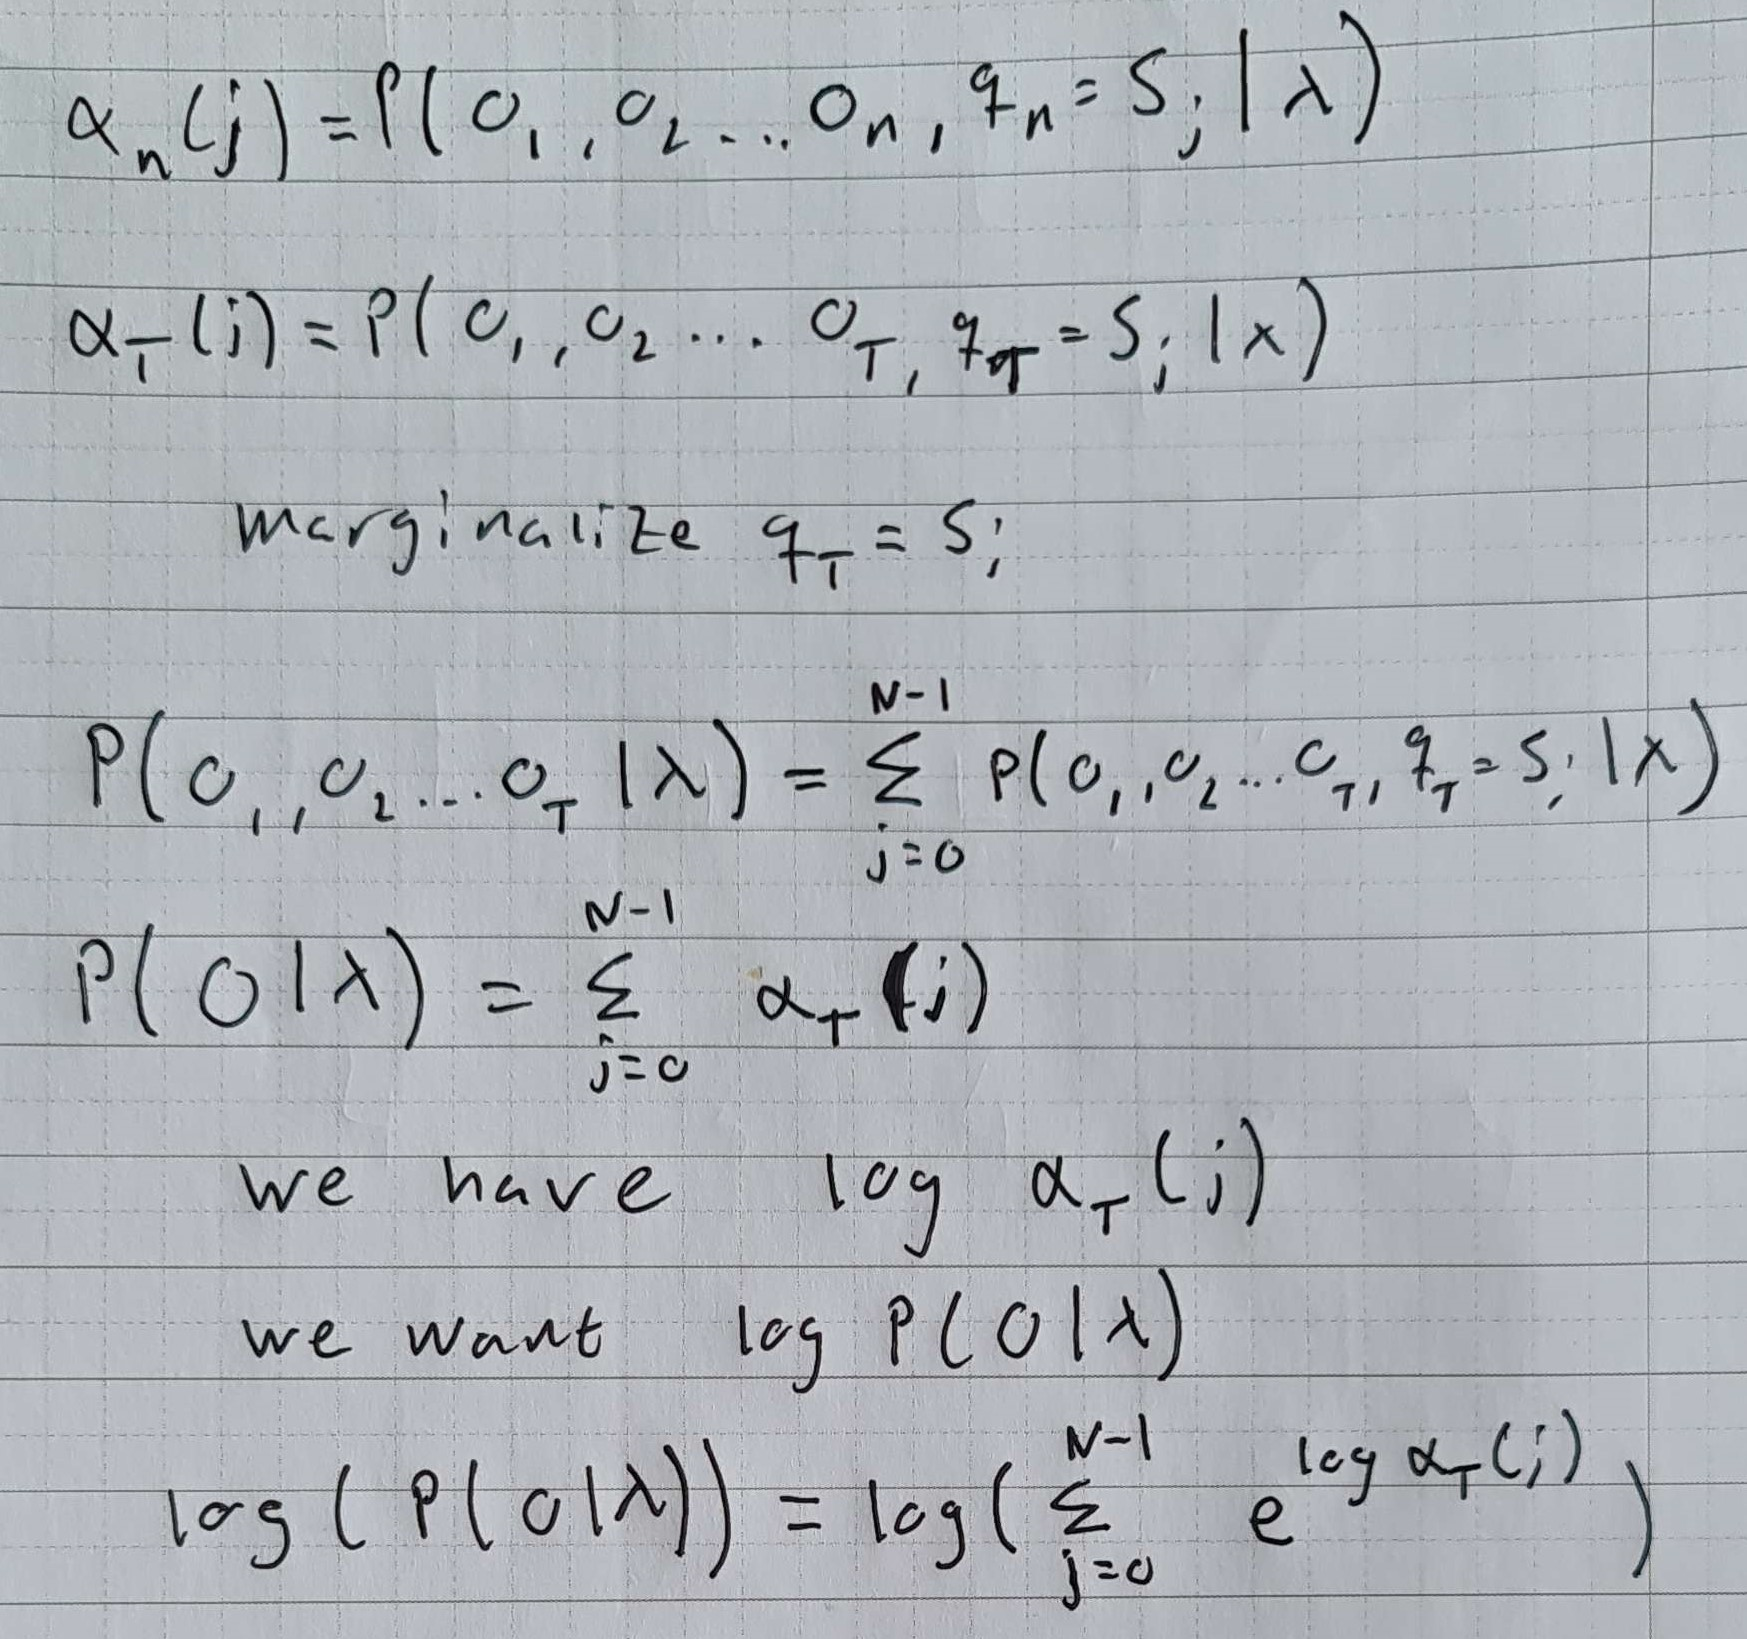

In [125]:
from lab2_tools import logsumexp
loglik=logsumexp(fwd[-1,:])
np.allclose(loglik,example['loglik'])

True

each of the 44 utterances

In [182]:
def hmmind_2_uttr(arr):
    out = []
    for i in arr:
        out.append(hmmind_2_uttr_help(i))
    return out

def hmmind_2_uttr_help(x):
    if x== 0:
        return "o"
    elif x==1:
        return "z"
    return str(x-1)

C:\Users\A\AppData\Local\Temp\ipykernel_11340\2432341296.py:14: RuntimeWarning: divide by zero encountered in log
  fwd=forward(log_likelihoods,np.log(HMM["startprob"]),np.log(HMM["transmat"]))


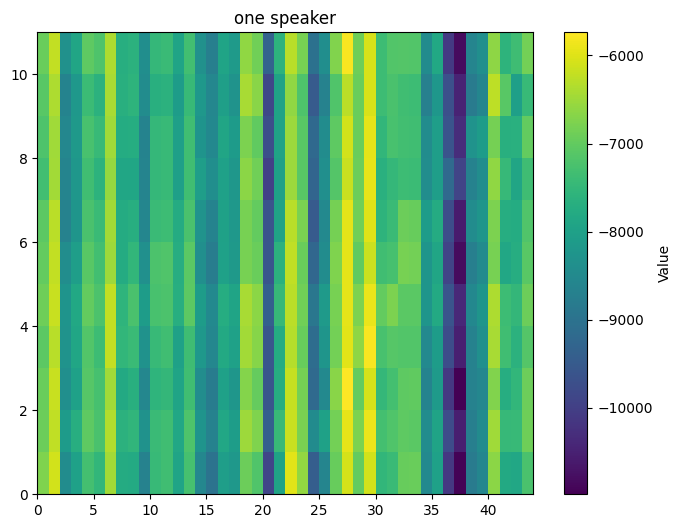

In [194]:
#one speaker
HMMs = {}
phoneHMM_one_speaker = np.load('lab2_models_onespkr.npz', allow_pickle=True)['phoneHMMs'].item()
for wordKey in isolated:
        HMMs[wordKey] = concatHMMs(phoneHMM_one_speaker, isolated[wordKey])

data_matrix = np.zeros((len(HMMs),len(data)))
#run each HMM on each datapoint
for h,hmmKey in enumerate(HMMs):
    HMM = HMMs[hmmKey]
    for d,datapoint in enumerate(data):
        Xn = datapoint["lmfcc"]
        log_likelihoods=log_multivariate_normal_density_diag(Xn,HMM["means"],HMM["covars"])
        fwd=forward(log_likelihoods,np.log(HMM["startprob"]),np.log(HMM["transmat"]))
        loglik=logsumexp(fwd[-1,:])
        data_matrix[h,d] = loglik
plot(data_matrix,title="one speaker")

In [195]:
print("predicted class based on highest HMM activation")
pred = hmmind_2_uttr(np.argmax(data_matrix,axis=0))
print(pred)
ground_truth = []
for d in data:
    ground_truth.append(d["digit"])
print("actual class")
print(ground_truth)
print(f"accuracy: {np.mean(np.array(ground_truth)==np.array(pred))}")

predicted class based on highest HMM activation
['o', 'o', 'z', 'z', '3', '9', '3', '2', '3', '3', '4', '4', '3', '3', '6', '6', '3', '3', '3', '3', '9', 'z', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9']
actual class
['o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9']
accuracy: 0.7727272727272727


C:\Users\A\AppData\Local\Temp\ipykernel_11340\4014919524.py:14: RuntimeWarning: divide by zero encountered in log
  fwd=forward(log_likelihoods,np.log(HMM["startprob"]),np.log(HMM["transmat"]))


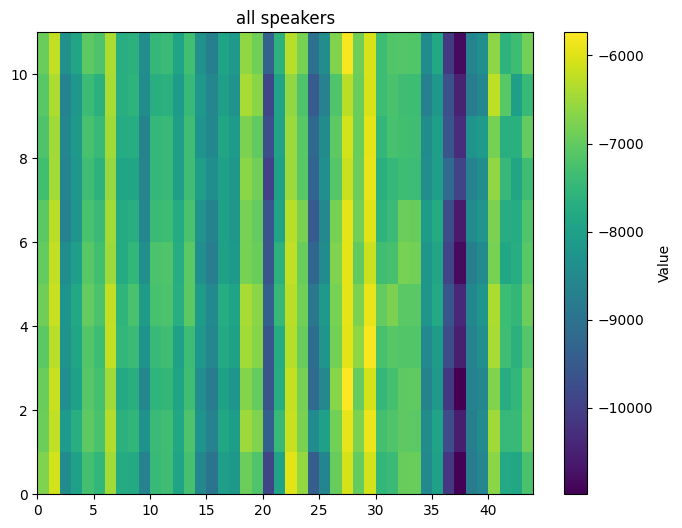

In [196]:
#all speakers
HMMs = {}
phoneHMM_all_speakers = np.load('lab2_models_all.npz', allow_pickle=True)['phoneHMMs'].item()
for wordKey in isolated:
        HMMs[wordKey] = concatHMMs(phoneHMM_one_speaker, isolated[wordKey])

data_matrix = np.zeros((len(HMMs),len(data)))
#run each HMM on each datapoint
for h,hmmKey in enumerate(HMMs):
    HMM = HMMs[hmmKey]
    for d,datapoint in enumerate(data):
        Xn = datapoint["lmfcc"]
        log_likelihoods=log_multivariate_normal_density_diag(Xn,HMM["means"],HMM["covars"])
        fwd=forward(log_likelihoods,np.log(HMM["startprob"]),np.log(HMM["transmat"]))
        loglik=logsumexp(fwd[-1,:])
        data_matrix[h,d] = loglik
plot(data_matrix,title="all speakers")

In [197]:
print("predicted class based on highest HMM activation")
pred = hmmind_2_uttr(np.argmax(data_matrix,axis=0))
print(pred)
ground_truth = []
for d in data:
    ground_truth.append(d["digit"])
print("actual class")
print(ground_truth)
print(f"accuracy: {np.mean(np.array(ground_truth)==np.array(pred))}")

predicted class based on highest HMM activation
['o', 'o', 'z', 'z', '3', '9', '3', '2', '3', '3', '4', '4', '3', '3', '6', '6', '3', '3', '3', '3', '9', 'z', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9']
actual class
['o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9', 'o', 'o', 'z', 'z', '1', '1', '2', '2', '3', '3', '4', '4', '5', '5', '6', '6', '7', '7', '8', '8', '9', '9']
accuracy: 0.7727272727272727


## 5.3